In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]



In [3]:
print(dataset.shape)


(50, 5)


In [4]:
print(dataset.dtypes)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [5]:
# Missing values
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
# head
print(dataset.head(20))


    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [7]:
print(dataset.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [8]:
print(dataset['State'].value_counts())

New York      17
California    17
Florida       16
Name: State, dtype: int64


In [9]:
# for Percentages
print(dataset['State'].value_counts()/dataset.shape[0])

New York      0.34
California    0.34
Florida       0.32
Name: State, dtype: float64


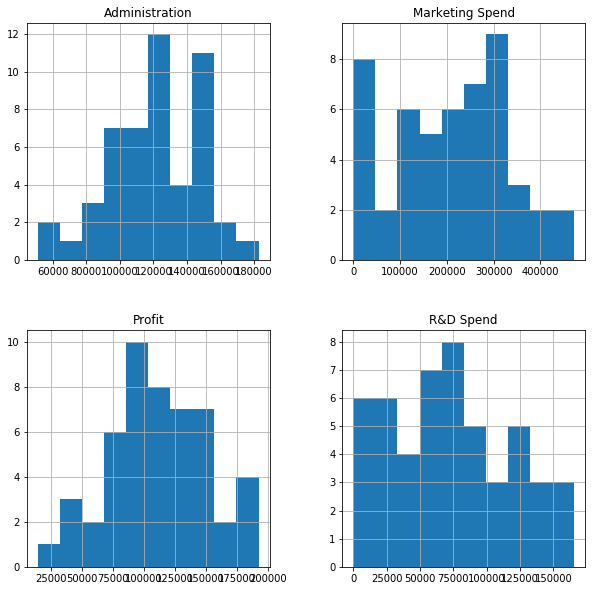

In [10]:
# histograms
dataset.hist(figsize=(10,10))
plt.show()


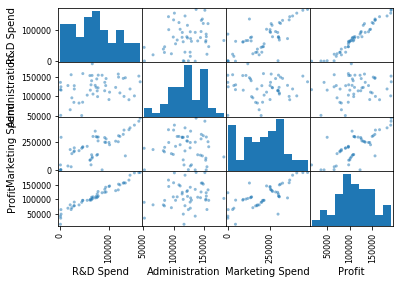

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(dataset)
plt.show()

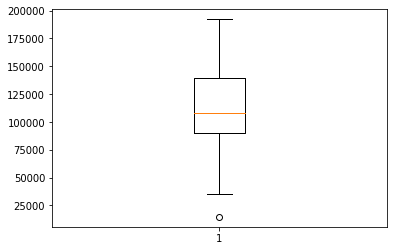

In [12]:
plt.boxplot(dataset['Profit'])
plt.show()

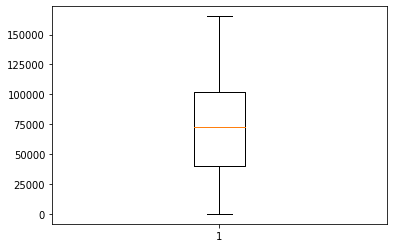

In [13]:
plt.boxplot(dataset['R&D Spend'])
plt.show()

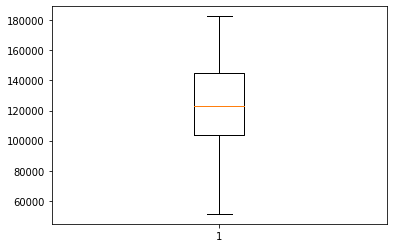

In [14]:
plt.boxplot(dataset['Administration'])
plt.show()

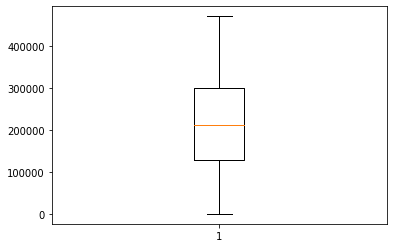

In [15]:
plt.boxplot(dataset['Marketing Spend'])
plt.show()

In [16]:
# Outliers handleing
# Here we will  cap the outlier for above 95th percentile to 95th percentile and  below 5th percentile to 5th percentile

#dataset.loc[dataset['CreditScore']>dataset['CreditScore'].quantile(0.95),['CreditScore']]=dataset['CreditScore'].quantile(0.95)

#dataset.loc[dataset['salary']>dataset['salary'].quantile(0.95),['salary']]=dataset['salary'].quantile(0.95)
dataset.loc[dataset['Profit']<dataset['Profit'].quantile(0.05),['Profit']]=dataset['Profit'].quantile(0.05)


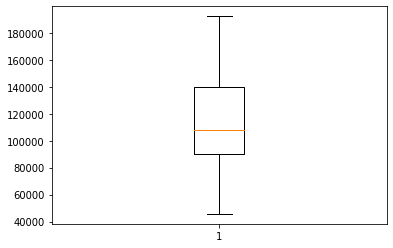

In [17]:
plt.boxplot(dataset['Profit'])
plt.show()

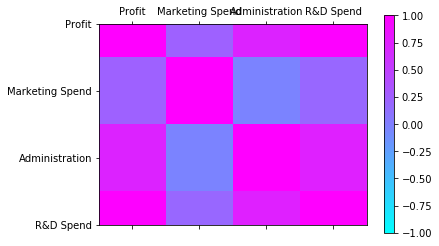

In [18]:
# correlation matrix
cols=['Profit','Marketing Spend','Administration','R&D Spend']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(),cmap='cool', vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)
plt.show()

In [19]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.980966
Administration,0.241955,1.000000,-0.032154,0.195216
Marketing Spend,0.724248,-0.032154,1.000000,0.748498
Profit,0.980966,0.195216,0.748498,1.000000


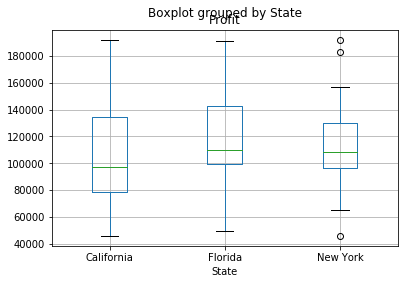

In [20]:

#Categorical-Continuous combination
dataset.boxplot(column='Profit', by= 'State')

In [21]:
#Convert the column into categorical columns

states=pd.get_dummies(X['State'],drop_first=True)
# Drop the state coulmn
X=X.drop('State',axis=1)

# concat the dummy variables
X=pd.concat([X,states],axis=1)


In [22]:
X

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,0,0
7,130298.13,145530.06,323876.68,1,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,0,0


In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [25]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

48930.16638970106
[ 7.50600463e-01  1.70739263e-02  3.16812707e-02 -2.52333274e+03
 -1.46451263e+02]


In [26]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,0.750600
Administration,0.017074
Marketing Spend,0.031681
Florida,-2523.332740
New York,-146.451263


In [27]:
from sklearn.metrics import r2_score
regressor.coef_

r2 = r2_score(y_train,regressor.predict(X_train))
print(r2)

0.9685285132685564


In [28]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9383795704565936


In [28]:
#import seaborn as sns

#sns.distplot((y_test-y_pred),bins=50);